In [56]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
Customers_data=pd.read_csv('gdrive/My Drive/Zeotap/Customers.csv')
Customers_data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [57]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
Products_data=pd.read_csv('gdrive/My Drive/Zeotap/Products.csv')
Products_data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [60]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
Transactions_data=pd.read_csv('gdrive/My Drive/Zeotap/Transactions.csv')
Transactions_data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [64]:
# Merge datasets for customer segmentation
merged_data = Transactions_data.merge(Customers_data, on='CustomerID', how='left')
merged_data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [67]:
# merged_data = merged_data.merge(Products_data, on='ProductID', how='left')
# merged_data.head()

In [68]:
# Aggregate data for clustering
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first'  # Including region as a categorical feature
}).reset_index()

In [69]:
# Encode categorical feature 'Region'
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

In [70]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile.drop(['CustomerID'], axis=1))

In [71]:
# Find the optimal number of clusters (between 2 and 10)
db_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)

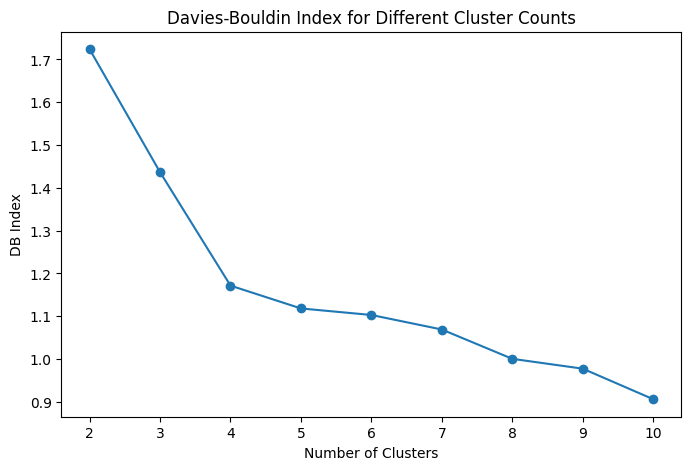

In [72]:
# Plot Davies-Bouldin Index to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [73]:
# Choose the number of clusters with the lowest DB Index
optimal_k = k_values[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

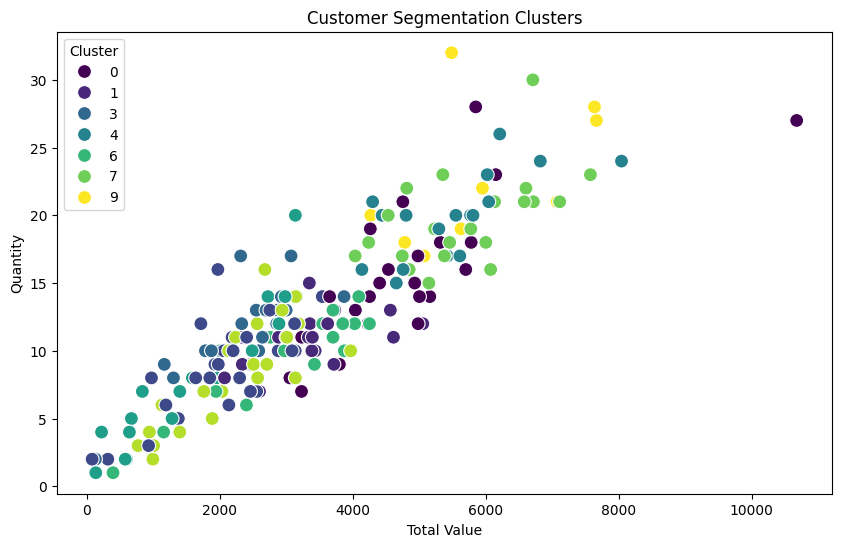

In [77]:
# Visualize clusters using relevant plots
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_profile['TotalValue'],
    y=customer_profile['Quantity'],
    hue=customer_profile['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

In [76]:
# Print clustering metrics
print(f"Optimal number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {min(db_scores)}")


Optimal number of clusters: 10
Davies-Bouldin Index: 0.9059764977714977


In [80]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, customer_profile['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_data, customer_profile['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score}")

Silhouette Score: 0.3733789301129998
Calinski-Harabasz Index: 73.99767270945217


Clustering Results Report
------------------------------
Number of Clusters: 10
Davies-Bouldin Index: 0.9059764977714977
Silhouette Score: 0.3733789301129998
Calinski-Harabasz Index: 73.99767270945217


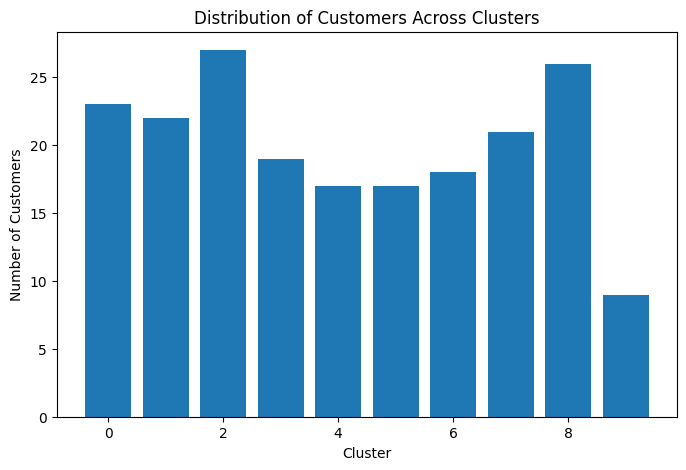

In [85]:
# Generate the report
print("Clustering Results Report")
print("-" * 30)
print(f"Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {min(db_scores)}")


# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, customer_profile['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_data, customer_profile['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score}")

# Additional visualizations or analysis can be included here
# For example:
# - Distribution of clusters
# - Cluster characteristics (mean values for features within each cluster)
# - Analysis of other metrics (e.g., Dunn Index if needed)

# Example of cluster size distribution
cluster_counts = customer_profile['Cluster'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()